## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

In [27]:
#代码复现在另一个jupyder notebook中

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [16]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [17]:
def loss2(y, y_hat): # to evaluate the performance 
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [18]:
loss([1, 1, 1], [2, 2, 3])

2.0

In [19]:
loss2([1, 1, 1], [2, 2, 3])

1.3333333333333333

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [42]:
from functools import wraps

In [59]:
solution = {}

In [38]:
def lru_cache(func):
    cache={}
    @wraps(func)
    def wrap(*args):
        if args not in cache:
            cache[args]=func(*args)
        return cache[args]
    return wrap

In [65]:
@lru_cache
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [66]:
edit_distance('CDFG', 'AEF')

3

In [67]:
solution

{('C', 'A'): 'SUB C => A',
 ('C', 'AE'): 'ADD E',
 ('C', 'AEF'): 'ADD F',
 ('CD', 'A'): 'DEL D',
 ('CD', 'AE'): 'SUB D => E',
 ('CD', 'AEF'): 'ADD F',
 ('CDF', 'A'): 'DEL F',
 ('CDF', 'AE'): 'DEL F',
 ('CDF', 'AEF'): '',
 ('CDFG', 'A'): 'DEL G',
 ('CDFG', 'AE'): 'DEL G',
 ('CDFG', 'AEF'): 'DEL G'}

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

In [ ]:
#我选择看《数学之美》

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:Bacause it can let us find out the extreme point of a function faster，it moves to faster acceleration direction.

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:Gredient means the function changes fastest and the rate of change is greatest along this direction at this point.
Descent means it is to find the minimum along the descending direction of the gradient (or the maximum along the ascending direction of the gradient).


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:It can ensure we are going on the right way to find out maximum or minimum of a function. It can be cost less time to help us find out maximum or minimum of a function.

4. Using the simple words to describe: What's the machine leanring.¶

Ans:Using a bunch of X to fitting target Y by attempting to find out a f(x).

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans:Bacuase it can help us save much computing cost，dynamic programming can avoid duplicate calculations.
difference:dynamic programming have storage,its essence is to change space for time,and it has high efficiency,but it is complex.
The advantage of search method is easy to implement, but its disadvantage is the sub-problem of repeated calculation.

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans:Dynamic programming is suitable for optimal substructure,if we use machine learning,it look like carrying coals to newcastle.

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans:knapsack problem、Cutting of Steel Bar、traveling salesman problem.

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans:review of papers、spell check、Gene Sequence Analysis.

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans:
1.Overlapping Subproblems:
In Dynamic Programming,Among the problems we have to deal with,some sub-problems will be recalculated many times.

2.Overlapping computing saved in a table:
In Dynamic Programming ,each sub-problem is computed only once,and then the results are 
stored in a table.When it needs to be recalculated,we just need to look at the results in the table simply,
so Dynamic Programming has high efficiency.

3.Parse solution:
The optimal solution of the problem contains the optimal solution of the sub-problem.

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:Stage division of different problems need different approaches,there is no uniform method.

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [73]:
import random
import matplotlib.pylab as plt

In [79]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

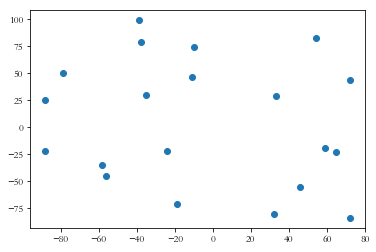

In [80]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [81]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

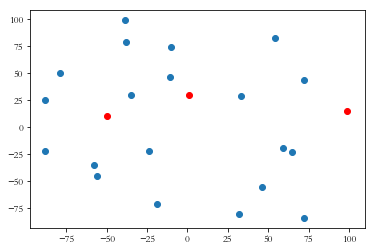

In [82]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro

In [83]:
latitudes,longitude

([59,
  -38,
  -11,
  72,
  65,
  -58,
  -24,
  -10,
  -19,
  -35,
  46,
  72,
  -88,
  54,
  32,
  -39,
  -56,
  -88,
  33,
  -79],
 [-19,
  79,
  46,
  44,
  -23,
  -35,
  -22,
  74,
  -71,
  30,
  -55,
  -84,
  -22,
  83,
  -80,
  99,
  -45,
  25,
  29,
  50])

In [84]:
z = list(zip(latitudes,longitude))
z

[(59, -19),
 (-38, 79),
 (-11, 46),
 (72, 44),
 (65, -23),
 (-58, -35),
 (-24, -22),
 (-10, 74),
 (-19, -71),
 (-35, 30),
 (46, -55),
 (72, -84),
 (-88, -22),
 (54, 83),
 (32, -80),
 (-39, 99),
 (-56, -45),
 (-88, 25),
 (33, 29),
 (-79, 50)]

In [71]:
import numpy as np
import pandas as pd
import matplotlib
import math
matplotlib.rcParams['font.family']= 'STSong'

In [85]:
city_name=[]
city_condition=[]
with open('data3.txt','r') as f:
    lines=f.readlines()
    for line in lines:
        line=line.split('\n')[0]
        line=line.split(',')
        city_name.append(line[0])
        city_condition.append([float(line[1]),float(line[2])])

In [87]:
#展示地图
# plt.scatter(city_condition[:,0],city_condition[:,1])
# plt.show()
 
#距离矩阵
city_count=len(city_name)
Distance=np.zeros([city_count,city_count])
for i in range(city_count):
    for j in range(city_count):
        Distance[i][j]=math.sqrt((city_condition[i][0]-city_condition[j][0])**2+(city_condition[i][1]-city_condition[j][1])**2)

In [88]:
#种群数
count=300
#改良次数
improve_count=10000
#进化次数
itter_time=3000
 
#设置强者的定义概率，即种群前30%为强者
retain_rate=0.3
 
#设置弱者的存活概率
random_select_rate=0.5
 
#变异率
mutation_rate=0.1
 
#设置起点
origin=15
index=[i for i in range(city_count)]
index.remove(15)

In [89]:
# def get_path(x):
#     graded = [[x[i], index[i]] for i in range(len(x))]
#     graded_index = [t[1] for t in sorted(graded)]
#     return graded_index
#总距离
def get_total_distance(x):
    distance=0
    distance+=Distance[origin][x[0]]
    for i in range(len(x)):
        if i==len(x)-1:
            distance += Distance[origin][x[i]]
        else:
            distance += Distance[x[i]][x[i+1]]
    return distance
 
#改良
def improve(x):
    i=0
    distance=get_total_distance(x)
    while i<improve_count:
        # randint [a,b]
        u=random.randint(0,len(x)-1)
        v = random.randint(0, len(x)-1)
        if u!=v:
            new_x=x.copy()
            t=new_x[u]
            new_x[u]=new_x[v]
            new_x[v]=t
            new_distance=get_total_distance(new_x)
            if new_distance<distance:
                distance=new_distance
                x=new_x.copy()
        else:
            continue
        i+=1

#自然选择
def selection(population):
    """
    选择
    先对适应度从大到小排序，选出存活的染色体
    再进行随机选择，选出适应度虽然小，但是幸存下来的个体
    """
    # 对总距离从小到大进行排序
    graded = [[get_total_distance(x), x] for x in population]
    graded = [x[1] for x in sorted(graded)]
    # 选出适应性强的染色体
    retain_length = int(len(graded) * retain_rate)
    parents = graded[:retain_length]
    # 选出适应性不强，但是幸存的染色体
    for chromosome in graded[retain_length:]:
        if random.random() < random_select_rate:
            parents.append(chromosome)
    return parents
 
#交叉繁殖
def crossover(parents):
    #生成子代的个数,以此保证种群稳定
    target_count=count-len(parents)
    #孩子列表
    children=[]
    while len(children)<target_count:
        male_index = random.randint(0, len(parents) - 1)
        female_index = random.randint(0, len(parents) - 1)
        if male_index!=female_index:
            male=parents[male_index]
            female=parents[female_index]
 
            left=random.randint(0,len(male)-2)
            right=random.randint(left+1,len(male)-1)
 
            #交叉片段
            gene1=male[left:right]
            gene2=female[left:right]
 
            child1_c=male[right:]+male[:right]
            child2_c=female[right:]+female[:right]
            child1=child1_c.copy()
            child2= child2_c.copy()
 
            for o in gene2:
                child1_c.remove(o)
 
            for o in gene1:
                child2_c.remove(o)
 
            child1[left:right]=gene2
            child2[left:right]=gene1
 
            child1[right:]=child1_c[0:len(child1)-right]
            child1[:left] = child1_c[len(child1) - right:]
 
            child2[right:] = child2_c[0:len(child1) - right]
            child2[:left] = child2_c[len(child1) - right:]
 
            children.append(child1)
            children.append(child2)
 
    return children
 
#变异
def mutation(children):
    for i in range(len(children)):
        if random.random() < mutation_rate:
            child=children[i]
            u=random.randint(1,len(child)-4)
            v = random.randint(u+1, len(child)-3)
            w= random.randint(v+1, len(child)-2)
            child=children[i]
            child=child[0:u]+child[v:w]+child[u:v]+child[w:]

#得到最佳纯输出结果
def get_result(population):
    graded = [[get_total_distance(x), x] for x in population]
    graded = sorted(graded)
    return graded[0][0],graded[0][1]

In [90]:
#使用改良圈算法初始化种群
population=[]
for i in range(count):
    #随机生成个体
    x=index.copy()
    random.shuffle(x)
    improve(x)
    population.append(x)

register=[]
i=0
distance, result_path = get_result(population)
while i<itter_time:
    #选择繁殖个体群
    parents=selection(population)
    #交叉繁殖
    children=crossover(parents)
    #变异操作
    mutation(children)
    #更新种群
    population=parents+children
 
    distance,result_path=get_result(population)
    register.append(distance)
    i=i+1

In [91]:
print(distance)
print(result_path)

859.765866179451
[0, 4, 10, 11, 14, 8, 6, 5, 16, 12, 17, 19, 9, 2, 18, 3, 13, 7, 1]


In [92]:
dataset=np.mat(city_condition)

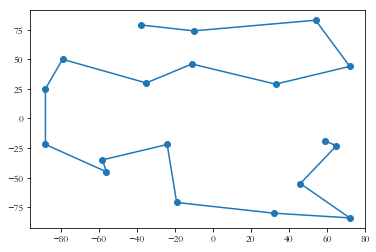

In [93]:
X=[]
Y=[]
for index in result_path:
    X.append(dataset[index,0])
    Y.append(dataset[index, 1])
plt.plot(X,Y,'-o')
plt.show()

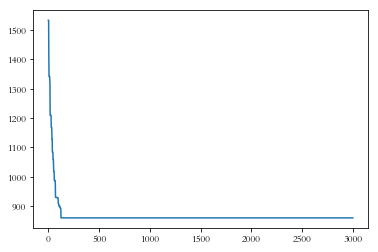

In [94]:
plt.plot(list(range(len(register))),register)
plt.show()